<a href="https://colab.research.google.com/github/skywalker0803r/deep-learning-ian-goodfellow/blob/master/chatgpt%E8%82%A1%E7%A5%A8%E4%BA%8C%E9%83%A8%E6%9B%B2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import yfinance as yf
import pandas as pd
import numpy as np
import datetime as dt
import requests
from textblob import TextBlob
from sklearn.preprocessing import LabelEncoder

# 設定要取得的股票代碼和時間範圍
ticker = "AAPL"
start_date = dt.datetime(2013, 1, 18)
end_date = dt.datetime(2023, 2, 18)

# 使用 yfinance 取得股票價格資料
df = yf.download(ticker, start=start_date, end=end_date)

# 新增其他相關數據欄位
# 市場情緒：VIX波動率指數
vix_url = "https://fred.stlouisfed.org/graph/fredgraph.csv?id=VIXCLS"
vix_df = pd.read_csv(vix_url, index_col=0, parse_dates=True)
df = pd.merge(df, vix_df, how='left', left_index=True, right_index=True)

# 政治因素：美國總統就職日期
inauguration_dates = {
    'Trump': '2017-01-20',
    'Biden': '2021-01-20'
}
df['Inauguration'] = np.nan
for president, date in inauguration_dates.items():
    inauguration = pd.to_datetime(date)
    df['Inauguration'][df.index >= inauguration] = president
le = LabelEncoder()
df['Inauguration'] = le.fit_transform(df['Inauguration'].astype(str))


# 儲存處理後的資料
df.to_csv('stock_data.csv')


[*********************100%***********************]  1 of 1 completed


<ipython-input-10-fe4cb6ae6264>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Inauguration'][df.index >= inauguration] = president


In [11]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,VIXCLS,Inauguration
Date,,,,,,,,
2013-01-18,17.804285,17.936428,17.728571,17.857143,15.333514,472922800,12.46,2
2013-01-22,18.020000,18.138571,17.736786,18.027500,15.479795,461546400,12.43,2
2013-01-23,18.171785,18.392500,18.027500,18.357500,15.763156,861509600,12.46,2
2013-01-24,16.428572,16.633215,16.080357,16.089287,13.815496,1460852400,12.69,2
2013-01-25,16.131786,16.293928,15.535714,15.710000,13.489812,1208026400,12.89,2


In [12]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# 讀取資料
df = pd.read_csv('stock_data.csv', index_col=0)

# 計算收盤價的一階差分
df['Close_diff'] = df['Adj Close'].diff()

# 計算 VIX 的 5 日移動平均值
df['VIX_5MA'] = df['VIXCLS'].rolling(window=5).mean()

# 計算收盤價的未來一天差分
df['Close_diff_shifted'] = df['Close_diff'].shift(-1)

# 計算未來一天收盤價
df['Close_Tomorrow'] = df['Close'].shift(-1)

df = df.dropna()
df_processed = df

# 儲存處理後的資料
df_processed.to_csv('processed_data.csv')


In [13]:
df_processed.head()

,Open,High,Low,Close,Adj Close,Volume,VIXCLS,Inauguration,Close_diff,VIX_5MA,Close_diff_shifted,Close_Tomorrow
Date,,,,,,,,,,,,
2013-01-25,16.131786,16.293928,15.535714,15.710000,13.489812,1208026400,12.89,2,-0.325685,12.586,0.305136,16.065357
2013-01-28,15.636786,16.186071,15.566429,16.065357,13.794948,785517600,13.57,2,0.305136,12.808,0.258829,16.366785
2013-01-29,16.375000,16.435715,16.147142,16.366785,14.053777,571158000,13.31,2,0.258829,12.984,-0.044162,16.315357
2013-01-30,16.321428,16.521429,16.232143,16.315357,14.009615,417155200,14.32,2,-0.044162,13.356,-0.041090,16.267500
2013-01-31,16.320715,16.402857,16.249287,16.267500,13.968525,319334400,14.28,2,-0.041090,13.674,-0.057347,16.200714


Epoch 1/10
55/55 [==============================] - 9s 74ms/step - loss: 0.0021
Epoch 2/10
55/55 [==============================] - 3s 47ms/step - loss: 2.1630e-04
Epoch 3/10
55/55 [==============================] - 3s 48ms/step - loss: 1.9417e-04
Epoch 4/10
55/55 [==============================] - 3s 47ms/step - loss: 1.7431e-04
Epoch 5/10
55/55 [==============================] - 3s 58ms/step - loss: 1.5841e-04
Epoch 6/10
55/55 [==============================] - 3s 46ms/step - loss: 1.6183e-04
Epoch 7/10
55/55 [==============================] - 3s 46ms/step - loss: 1.4638e-04
Epoch 8/10
55/55 [==============================] - 3s 47ms/step - loss: 1.3690e-04
Epoch 9/10
55/55 [==============================] - 3s 56ms/step - loss: 1.4508e-04
Epoch 10/10
55/55 [==============================] - 3s 51ms/step - loss: 1.2206e-04


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


24/24 [==============================] - 0s 15ms/step


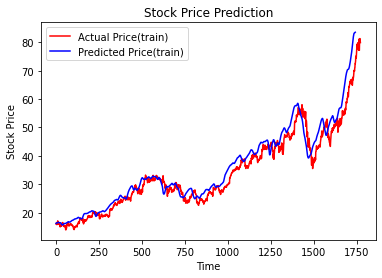

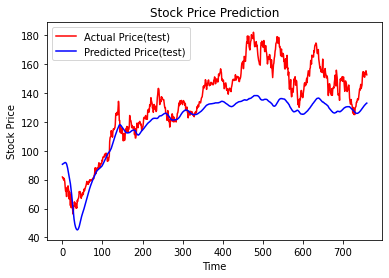

In [16]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

# 讀取資料
df = pd.read_csv('processed_data.csv', index_col=0)

# 分割訓練集和測試集
train_size = int(len(df) * 0.7)
train_data = df.iloc[:train_size, :]
test_data = df.iloc[train_size:, :]

# 標準化數據
scaler = MinMaxScaler()
train_data_scaled = scaler.fit_transform(train_data)
test_data_scaled = scaler.transform(test_data)

# y各自做特徵縮放
y_max = df['Close_Tomorrow'].max()
y_min = df['Close_Tomorrow'].min()
train_data_scaled[:,-1] = (train_data['Close_Tomorrow'].values-y_min)/(y_max-y_min)
test_data_scaled[:,-1] = (test_data['Close_Tomorrow'].values-y_min)/(y_max-y_min)

def inverse_transform_y(y):
  y *= (y_max-y_min)
  y += y_min
  return y

# 設定時間窗口大小
window_size = 30

# 創建 X_train 和 y_train
X_train, y_train = [], []
for i in range(0,len(train_data_scaled)-window_size):
    X_train.append(train_data_scaled[i:i+window_size, :])
    y_train.append(train_data_scaled[i+window_size, -1])
X_train, y_train = np.array(X_train), np.array(y_train)

# 創建 LSTM 模型
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dense(units=1))

# 編譯模型
model.compile(optimizer='adam', loss='mean_squared_error')

# 訓練模型
model.fit(X_train, y_train, epochs=10, batch_size=32)

# 預測未來的股價
inputs = df.iloc[len(df)-len(test_data)-window_size:, :].values
inputs = scaler.transform(inputs)
X_test = []
for i in range(window_size, len(inputs)):
    X_test.append(inputs[i-window_size:i, :])
X_test = np.array(X_test)

train_predicted_price = inverse_transform_y(model.predict(X_train))
test_predicted_price = inverse_transform_y(model.predict(X_test))

# 視覺化結果
import matplotlib.pyplot as plt
plt.plot(train_data['Close_Tomorrow'].values, color='red', label='Actual Price(train)')
plt.plot(train_predicted_price, color='blue', label='Predicted Price(train)')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

plt.plot(test_data['Close_Tomorrow'].values, color='red', label='Actual Price(test)')
plt.plot(test_predicted_price, color='blue', label='Predicted Price(test)')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()
